In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
fm_data = pd.read_excel('./FinModel-DRAFT-042623-TEST.xlsm', sheet_name="TransposedData")

In [2]:
fm_data = fm_data.drop(index=0).assign(date = lambda x: pd.to_datetime(x.month)).set_index('date')

<AxesSubplot: xlabel='date'>

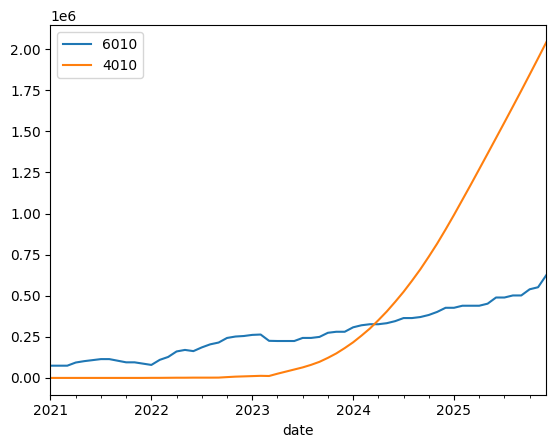

In [3]:
fm_data[[6010, 4010]].plot(kind='line')

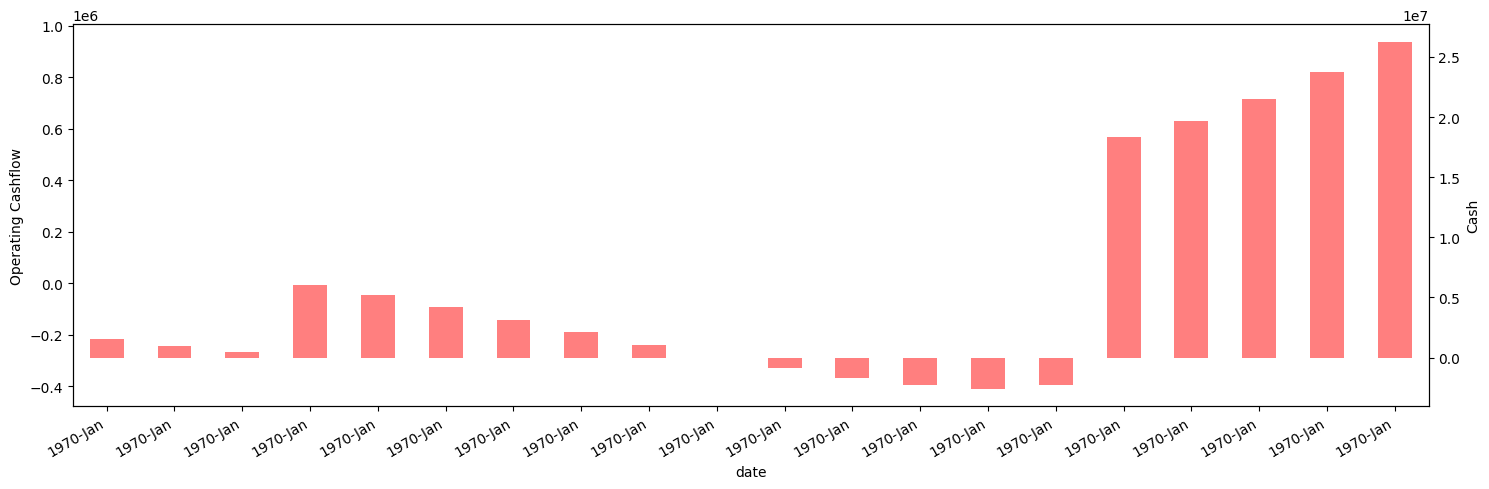

In [4]:
fig, ax1 = plt.subplots(sharex=True,figsize=(15,5))
fm_data['op_cflow'].plot(kind='line', color='blue', ax=ax1)
ax1.set_ylabel('Operating Cashflow')
fig.autofmt_xdate()
ax2 = ax1.twinx()
fm_data['cash'].resample('Q').last().plot(kind='bar', color='red', alpha=0.5, ax=ax2)
ax2.set_ylabel('Cash')
#ax1.xaxis.set_major_locator(mdates.MonthLocator((1,4,7,10)))  # set major ticks at the start of each quarter
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

# fm_data.index = fm_data.index.strftime('%Y')
# ax1.grid(True)
fig.tight_layout()

In [5]:
cash_qtrly = fm_data['cash'].resample('Q').last()
cash_qtrly.head()


date
2021-03-31    1504234.04
2021-06-30     982511.68
2021-09-30     446341.21
2021-12-31    6005892.02
2022-03-31    5217553.41
Freq: Q-DEC, Name: cash, dtype: object

In [6]:
fm_data = fm_data.reset_index()
#fm_data=fm_data.drop(columns='date')

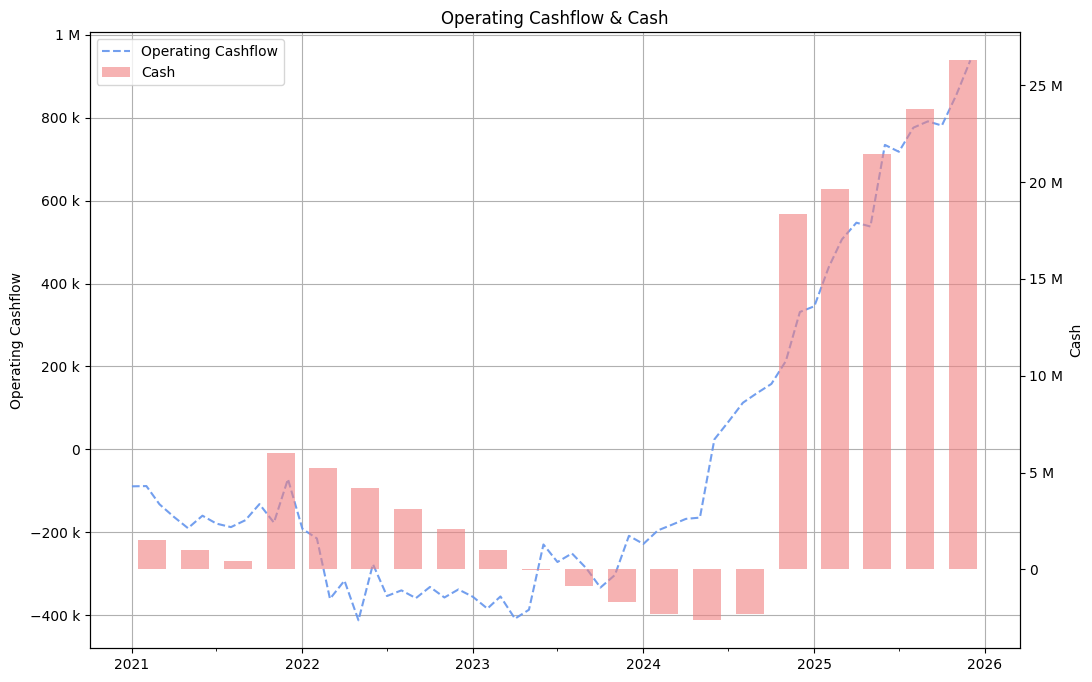

In [7]:
from matplotlib.ticker import EngFormatter

fig, ax1 = plt.subplots(sharex=True,figsize=(12,8))
line1 = ax1.plot(fm_data['date'], fm_data['op_cflow'], '--', color='cornflowerblue', alpha=0.9)
ax1.set_ylabel('Operating Cashflow')
ax2 = ax1.twinx()
offset_qtr_dates = pd.DateOffset(days=45)
qtr_dates = cash_qtrly.index - offset_qtr_dates
bar1 = ax2.bar(qtr_dates, cash_qtrly, color='lightcoral', alpha=0.6, width=60)
ax2.set_ylabel('Cash')
ax1.grid(True)
ax1.xaxis.set_major_locator(mdates.MonthLocator(1))  # set major ticks at the start of each quarter
ax1.xaxis.set_minor_locator(mdates.MonthLocator(7))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.yaxis.set_major_formatter(EngFormatter())
ax2.yaxis.set_major_formatter(EngFormatter())
ax1.legend(handles=[line1[0], bar1[0]], labels=['Operating Cashflow', 'Cash'], loc='upper left')
plt.title('Operating Cashflow & Cash')
# fm_data.index = fm_data.index.strftime('%Y')

# fig.tight_layout()
plt.savefig('opcf_cash.png')

In [231]:
plt.savefig('opcf_cash.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
fm_data = fm_data.reset_index()

In [177]:
fm_data = fm_data.drop(columns='index')

In [181]:
fm_data.shape

(5, 13)

In [182]:
fm_data

,date,month,act_fcast,6010,6020,6030,6040,4010,cash,op_cflow,inv_cfloe,fin_cflow,net_chg_cash
0,2021-01-01,2021-01-01 00:00:00,Act,74436.68,0,0,0,0,1724450.27,-88807.18,682,0,-88125.18
1,2021-02-01,2021-02-01 00:00:00,Act,74436.68,0,0,0,0,1636283.73,-88166.54,0,0,-88166.54
2,2021-03-01,2021-03-01 00:00:00,Act,74436.68,0,0,0,0,1504234.04,-132049.69,0,0,-132049.69
3,2021-04-01,2021-04-01 00:00:00,Act,93603.35,0,0,0,0,1338381.27,-162562.62,-3290.15,0,-165852.77
4,2021-05-01,2021-05-01 00:00:00,Act,101936.68,0,0,0,0,1145769.82,-189618.99,-2992.46,0,-192611.45


In [234]:
from matplotlib.ticker import EngFormatter

In [198]:
cash_qtrly

date
2021-03-31         1504234.04
2021-06-30          982511.68
2021-09-30          446341.21
2021-12-31         6005892.02
2022-03-31         5217553.41
2022-06-30         4207350.35
2022-09-30          3130922.6
2022-12-31         2105961.77
2023-03-31         1011924.41
2023-06-30      -10973.285236
2023-09-30      -832714.19734
2023-12-31    -1689574.078533
2024-03-31    -2307559.146524
2024-06-30    -2623580.883835
2024-09-30    -2316576.664485
2024-12-31    18367940.599284
2025-03-31    19659440.945297
2025-06-30    21463798.043195
2025-09-30    23747587.132477
2025-12-31    26280346.522552
Freq: Q-DEC, Name: cash, dtype: object

In [199]:
type(cash_qtrly)

pandas.core.series.Series